In [2]:
import pandas as pd 
import numpy as np
import sys
import datetime
import spacy
tweets = pd.read_csv (r'C:\Users\enoch\Documents\notAboutToMakeMoney\trumptweets.csv')
prices = pd.read_csv (r'C:\Users\enoch\Documents\notAboutToMakeMoney\DX-Y.NYB.csv')


tweets["created_at"]= pd.to_datetime(tweets["created_at"]) 
tweets['date'] = tweets['created_at'].dt.date
prices["Date"]= pd.to_datetime(prices["Date"]) 
prices['date'] = prices['Date'].dt.date
prices = prices.set_index(['date'])
tweets = tweets.set_index(['date'])



  

In [4]:
prices

,Date,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2016-11-01,2016-11-01,98.389999,98.480003,97.639999,97.699997,97.699997,0
2016-11-02,2016-11-02,97.750000,97.800003,97.180000,97.400002,97.400002,0
2016-11-03,2016-11-03,97.379997,97.459999,97.040001,97.160004,97.160004,0
2016-11-04,2016-11-04,97.160004,97.349998,96.889999,97.070000,97.070000,0
2016-11-06,2016-11-06,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...
2020-07-19,2020-07-19,0.000000,0.000000,0.000000,0.000000,0.000000,0
2020-07-20,2020-07-20,96.010002,96.180000,95.730003,95.830002,95.830002,0
2020-07-21,2020-07-21,95.750000,95.919998,95.050003,95.120003,95.120003,0


In [7]:
relevantdate = prices.index.tolist() 
def following(time):
    if time not in relevantdate or (prices.loc[time].loc["High"]==0):
        return following(time+datetime.timedelta(days=1))
    else:
        return time;

def previous(time):
    if time not in relevantdate or (prices.loc[time].loc["High"]==0):
        return previous(time-datetime.timedelta(days=1))
    else:
        return time;


    
changes =[]


tweetdates = tweets.index.tolist()
for date in tweetdates:
    print(prices.loc[following(date+datetime.timedelta(days=1))].High,prices.loc[previous(date)].High)

    change = prices.loc[following(date+datetime.timedelta(days=1))].High - prices.loc[previous(date)].High
    print(change)
    changes.append(change)
   
 




96.699997 96.68
0.019996999999989384
96.699997 96.68
0.019996999999989384
96.699997 96.68
0.019996999999989384
96.699997 96.68
0.019996999999989384
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.2900009999999895
96.68 96.970001
-0.29000

0.35999999999999943
97.599998 97.239998
0.35999999999999943
97.599998 97.239998
0.35999999999999943
97.599998 97.239998
0.35999999999999943
97.599998 97.239998
0.35999999999999943
97.599998 97.239998
0.35999999999999943
97.599998 97.239998
0.35999999999999943
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.239998 97.25
-0.010002000000000066
97.25 97.739998
-0.48999799999999993
97.25 97.739998
-0.48999799999999993
97.25 97.739998
-0.4

0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.83000200000001 96.459999
0.3700030000000112
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5999989999999968
96.459999 97.059998
-0.5

-0.23000300000001062
98.32 98.550003
-0.23000300000001062
98.32 98.550003
-0.23000300000001062
98.32 98.550003
-0.23000300000001062
98.32 98.550003
-0.23000300000001062
98.32 98.550003
-0.23000300000001062
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.5399929999999955
98.550003 99.089996
-0.53999299999

100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.470001 100.489998
-0.019997000000003595
100.489998 100.559998
-0.06999999999999318
100.489998 100.559998
-0.06999999999999318
100.489998 100.559998
-0.06999999999999318
100.489998 100.559998
-0.06999999999999318
100.489998 100.559998
-0.06999999999999318
100.489998 100.559998
-0.069999999999

100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968
100.279999 99.940002
0.3399969999999968


99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.3899990000000031
99.599998 99.209999
0.389

-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.32 100.870003
-0.5500030000000038
100.870003 100.690002
0.18000099999999009
100.870003 100.690002
0.18000099999999009
100.870003 100.690002


100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
100.300003 99.980003
0.3200000000000074
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.980003 99.43
0.5500029999999896
99.43 99.629997
-0.1999969999999962
99.4

0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.08000200000000746
100.93 100.849998
0.0800020000

101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.8900069999999971
101.019997 101.910004
-0.890006999

102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.980003 102.989998
-0.009995000000003529
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.989998 102.839996
0.15000200000000063
102.

98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.809998 98.309998
0.5
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.6899949999999961
98.309998 96.620003
1.689994

97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.589996 97.699997
-0.1100009999999969
97.699997 98.089996
-0.3899990000000031
97.699997 98.089996
-0.3899990000000031
97.699997 98.089996
-0.3899990000000031
97.699997 98.089996
-0.3899990000000031
97.699997 98.089996
-0.3899990000000031
97.699997 98.089996
-0.3899990000000031


99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.639999 99.870003
-0.23000399999999388
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910004
-0.04000100000000373
99.870003 99.910

0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
99.050003 98.949997
0.10000600000000759
98.949997 98.879997
0.06999999999999318
98.949997 98.879997
0.06999999999999318
98.949997 98.879997
0.06999999999999318
98.949997 98.879997
0.06999999999999318
98.949997 98.879997


0.1399990000000031
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.57 98.32
0.25
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.3099979999999931
98.32 98.010002
0.

0.029998000000006186
98.190002 98.160004
0.029998000000006186
98.190002 98.160004
0.029998000000006186
98.190002 98.160004
0.029998000000006186
98.190002 98.160004
0.029998000000006186
98.190002 98.160004
0.029998000000006186
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.160004 98.0
0.1600040000000007
98.0 97.949997
0.050003000000003794
98.0 97.949997
0.0500030

97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.1100009999999969
97.800003 97.690002
0.110

97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794
97.529999 97.58000200000001
-0.050003000000003794


0.14000000000000057
96.730003 97.0
-0.2699970000000036
96.730003 97.0
-0.2699970000000036
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038
97.0 97.550003
-0.5500030000000038


-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.07999399999999923
97.160004 97.239998
-0.0799939999999

98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.379997 98.440002
-0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.440002 98.379997
0.06000500000000386
98.379997 98.379997
0.0
98.379997 98.379997
0.0
98.379997 98.379997

-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98.400002
-0.020004999999997608
98.379997 98

97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.13000500000001125
97.58000200000001 97.449997
0.1300050000

97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303
97.779999 97.650002
0.12999700000000303


98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739998
-0.20999899999999627
98.529999 98.739

99.25 99.010002
0.23999799999999993
99.25 99.010002
0.23999799999999993
99.25 99.010002
0.23999799999999993
99.25 99.010002
0.23999799999999993
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.010002000000000066
99.010002 99.0
0.01000200000

0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.66999799999999 99.459999
0.20999899999999627
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.15000100000000316
99.459999 99.309998
0.150001

0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.83000200000001 98.639999
0.19000300000000436
98.639999 98.620003
0.01999600000000612
98.639999 98.620003
0.01999600000000612
98.639999 98.620003
0.01999600000000612
98.639999 98.620003
0.01999600000000612
98.639999 98.620003
0.01999600000000612
98.639999 98.620003
0.01999600000000612
98.639999 98.620003
0.01999600000000612
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.06999900000000991
98.620003 98.690002
-0.0699990000000

98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.459999 98.510002
-0.050003000000003794
98.510002 98.519997
-0.009995000000003529
98.510002 98.519997
-0.009995000000003529
98.510002 98.519997
-0.00999500000

99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.3500059999999934
99.370003 99.019997
0.350

98.449997 98.389999
0.05999799999999311
98.449997 98.389999
0.05999799999999311
98.449997 98.389999
0.05999799999999311
98.449997 98.389999
0.05999799999999311
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000001
0.05999699999999564
98.389999 98.33000200000

98.050003 97.849998
0.20000500000000443
98.050003 97.849998
0.20000500000000443
98.050003 97.849998
0.20000500000000443
98.050003 97.849998
0.20000500000000443
98.050003 97.849998
0.20000500000000443
98.050003 97.849998
0.20000500000000443
98.050003 97.849998
0.20000500000000443
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943
97.849998 97.739998
0.10999999999999943


0.04000100000000373
98.209999 98.16999799999999
0.04000100000000373
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98.089996
0.08000199999999325
98.16999799999999 98

-0.18000000000000682
97.260002 97.440002
-0.18000000000000682
97.260002 97.440002
-0.18000000000000682
97.260002 97.440002
-0.18000000000000682
97.260002 97.440002
-0.18000000000000682
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 97.440002
0.0
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.440002 96.970001
0.47000100000001055
97.4400

-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002
-0.020004000000014344
97.41999799999999 97.440002


-0.4800030000000106
97.199997 97.68
-0.4800030000000106
97.199997 97.68
-0.4800030000000106
97.199997 97.68
-0.4800030000000106
97.199997 97.68
-0.4800030000000106
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.68 97.769997
-0.08999699999999677
97.769997 97.599998
0.16999900000000423
97.769997 97.599998
0.16999900000000423
97.769997 97.599998
0.16999900000000423
97.769997 97.599998
0.16999900000000423
97.769997 97.599998
0.16999900000000423
97.769997 97.599998
0.16999900000000423
97.7

-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-0.23999799999999993
96.940002 97.18
-

97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.0699989999999957
97.980003 97.910004
0.069

-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.07999399999999923
97.370003 97.449997
-0.0799939999999

0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
98.190002 97.779999
0.4100030000000032
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.36999500000000296
97.779999 97.410004
0.3699950000000029

0.3200000000000074
97.300003 96.980003
0.3200000000000074
97.300003 96.980003
0.3200000000000074
97.300003 96.980003
0.3200000000000074
97.300003 96.980003
0.3200000000000074
97.300003 96.980003
0.3200000000000074
97.300003 96.980003
0.3200000000000074
97.300003 96.980003
0.3200000000000074
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.980003 96.849998
0.13000499999999704
96.849998 96.68
0.16999799999999254
96.849998 96.68
0.16999799999999

97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069
97.449997 97.639999
-0.1900020000000069


-0.019996999999989384
97.18 97.199997
-0.019996999999989384
97.18 97.199997
-0.019996999999989384
97.18 97.199997
-0.019996999999989384
97.18 97.199997
-0.019996999999989384
97.18 97.199997
-0.019996999999989384
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.199997 97.120003
0.07999399999999923
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901
97.120003 96.690002
0.4300009999999901

96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331
96.480003 96.389999
0.09000399999999331


-0.009995000000003529
96.510002 96.519997
-0.009995000000003529
96.510002 96.519997
-0.009995000000003529
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.519997 96.940002
-0.4200050000000033
96.940002 97.120003
-0.18000099999999009
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.050003
0.06999999999999318
97.120003 97.

0.08000199999999325
97.209999 97.129997
0.08000199999999325
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.129997 97.160004
-0.030006999999997674
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999924
97.160004 97.309998
-0.1499939999999

0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.68 96.589996
0.09000400000000752
96.589996 97.120003
-0.5300069999999977
96.589996 97.120003
-0.5300069999999977
96.589996 97.120003
-0.5300069999999

95.370003 95.43
-0.05999700000000985
95.370003 95.43
-0.05999700000000985
95.370003 95.43
-0.05999700000000985
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.43 95.790001
-0.3600009999999969
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
95.790001 96.160004
-0.370002999999997
96.160004 96.029999
0.13000499999999704
96.160004 96.029999
0.13000499999999704
96.160004 96.029999
0.13000499999999704
96.160004 96.029999
0.13000499999999704
96.160004 96

95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.209999 95.660004
-0.45000500000000443
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.660004 95.739998
-0.07999399999999923
95.739998 95.220

96.400002 96.660004
-0.26000200000000007
96.400002 96.660004
-0.26000200000000007
96.400002 96.660004
-0.26000200000000007
96.400002 96.660004
-0.26000200000000007
96.400002 96.660004
-0.26000200000000007
96.400002 96.660004
-0.26000200000000007
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.660004 96.769997
-0.1099930000000029
96.769997 96.980003
-0.2100059999999928
96.769997 96.980003
-0.21000599999

94.66999799999999 94.860001
-0.19000300000000436
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.860001 94.720001
0.14000000000000057
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.5599980000000073
94.720001 95.279999
-0.55999800

0.22999599999998566
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.83000200000001 93.57
0.2600020000000143
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.57 93.629997
-0.05999700000000985
93.629997 93.459999
0.16999800000000675
93.629997 93.459999
0.16999800000000675
93.629997 93.459999
0.16999800000000675
93.629997 93.459999
0.16999800000000675
93.629997 93.459999


0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
90.480003 89.949997
0.5300060000000002
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.949997 89.779999
0.16999799999999254
89.779999 89.66999799999999
0.11000100000001112
89.779999 89.66999799999999
0.11000100000001112
89.779999 89.66999799999999
0.11000100000001112
89.779

-0.16999899999999002
90.190002 90.360001
-0.16999899999999002
90.190002 90.360001
-0.16999899999999002
90.190002 90.360001
-0.16999899999999002
90.190002 90.360001
-0.16999899999999002
90.190002 90.360001
-0.16999899999999002
90.360001 90.230003
0.1299980000000005
90.360001 90.230003
0.1299980000000005
90.360001 90.230003
0.1299980000000005
90.360001 90.230003
0.1299980000000005
90.360001 90.230003
0.1299980000000005
90.230003 89.779999
0.45000399999999274
90.230003 89.779999
0.45000399999999274
90.230003 89.779999
0.45000399999999274
90.230003 89.779999
0.45000399999999274
90.230003 89.779999
0.45000399999999274
90.230003 89.779999
0.45000399999999274
89.779999 90.059998
-0.27999899999998945
89.779999 90.059998
-0.27999899999998945
89.779999 90.059998
-0.27999899999998945
89.779999 90.059998
-0.27999899999998945
89.779999 90.059998
-0.27999899999998945
89.779999 90.059998
-0.27999899999998945
89.779999 90.059998
-0.27999899999998945
90.059998 90.220001
-0.16000300000000323
90.059998 9

-0.2800060000000002
90.699997 90.980003
-0.2800060000000002
90.699997 90.980003
-0.2800060000000002
90.699997 90.980003
-0.2800060000000002
90.699997 90.980003
-0.2800060000000002
90.699997 90.980003
-0.2800060000000002
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
90.980003 91.0
-0.019997000000003595
91.0 90.82
0.18000000000000682
91.0 90.82
0.18000000000000682
91.0 90.82
0.18000000000000682
91.0 90.82
0.18000000000000682
91.0 90.82
0.18000000000000682
90.82 90.83000200000001
-0.010002000000014277
90.82 90.83000200000001
-0.010002000000014277
90.82 90.83000200000001
-0.010002000000014277
90.82 90.83000200000001
-0.0100020000000142

0.15000100000000316
93.650002 93.489998
0.1600040000000007
93.650002 93.489998
0.1600040000000007
93.489998 93.360001
0.12999700000000303
93.489998 93.360001
0.12999700000000303
93.489998 93.360001
0.12999700000000303
93.489998 93.360001
0.12999700000000303
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.360001 93.25
0.1100009999999969
93.3600

94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
94.900002 95.150002
-0.25
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
95.150002 94.720001
0.4300010000000043
94.720001 94.010002
0.7099989999999963
94.720001 94.010002
0.7099989999999963
94.720001 94.010002
0.7099989999999963
94.720001 94.010002
0.7099989999999963
94.720001 94.010002
0.7099989999999963
94.720001 94.010002
0.709

0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.610001 93.290001
0.3199999999999932
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
93.290001 92.720001
0.5700000000000074
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.220001
0.5
92.720001 92.22

93.379997 93.629997
-0.25
93.629997 93.58000200000001
0.04999499999999557
93.629997 93.58000200000001
0.04999499999999557
93.629997 93.58000200000001
0.04999499999999557
93.629997 93.58000200000001
0.04999499999999557
93.629997 93.58000200000001
0.04999499999999557
93.629997 93.58000200000001
0.04999499999999557
93.629997 93.58000200000001
0.04999499999999557
93.58000200000001 93.58000200000001
0.0
93.58000200000001 93.58000200000001
0.0
93.58000200000001 93.58000200000001
0.0
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999999999926
93.58000200000001 93.760002
-0.1799999

0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.6799999999999926
96.510002 95.83000200000001
0.67999999999

99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
99.18 98.980003
0.19999700000001042
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
98.980003 99.459999
-0.47999599999999987
99.459999 99.389999
0.06999999999999318
99.459999 99.389999
0.06999999999999318
99.459999 99.389999
0.06999999999999318
99.459999 99.389999
0.06999999999999318
99.389999 99.220001
0.16999800000000675
99.389999 99.220001
0.1699980000000

-0.6900020000000069
101.07 101.760002
-0.6900020000000069
101.760002 101.379997
0.38000499999999704
101.760002 101.379997
0.38000499999999704
101.760002 101.379997
0.38000499999999704
101.760002 101.379997
0.38000499999999704
101.760002 101.379997
0.38000499999999704
101.760002 101.379997
0.38000499999999704
101.379997 101.110001
0.2699960000000061
101.379997 101.110001
0.2699960000000061
101.379997 101.110001
0.2699960000000061
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002
0.09999899999999684
101.110001 101.010002

101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.779999 101.739998
0.04000100000000373
101.739998 101.25
0.48999799999999993
101.739998 101.25
0.48999799999999993
101.739998 101.25
0.48999799999999993
101.739998 101.25
0.48999799999999993
101.739998 101.25
0.48999799999999993
101.25 100.599998
0.6500020000000006
101.25 100.599998
0.6500020000000006
101.25 100.599998
0.6500020000000006
101.25 100.599998
0.6500020000000006
100.599998 100.58000200000001
0.01999599999999191
100.599998 100.58000200000001
0.01999599999999191
100.599998 100.58000200000001
0.01999599999999191
100.599998 100.58000200000001
0.01999599999999191


In [18]:
tweets.to_csv('yo.csv')

In [15]:
thing=[]
for i in changes:
    thing.append(i>0)
tweets['label']=thing

In [43]:
tweets

,text,created_at,favorite_count,changes,label
date,,,,,
2020-07-13,So hard to watch @FoxNews anymore. They are wo...,2020-07-13 13:30:42,117169,0.019997,True
2020-07-13,Never in history have Police been treated so b...,2020-07-13 12:05:39,191214,0.019997,True
2020-07-13,“Republican voter registration is way up Democ...,2020-07-13 11:54:38,127048,0.019997,True
2020-07-13,Is this what you want for your President??? Wi...,2020-07-13 11:41:35,85316,0.019997,True
2020-07-12,No Radical Left anarchists agitators looters o...,2020-07-12 12:30:36,194467,-0.290001,False
...,...,...,...,...,...
2016-11-03,Watching my beautiful wife Melania speak about...,2016-11-03 19:25:37,55454,-0.110001,False
2016-11-03,Looking at Air Force One @ MIA. Why is he camp...,2016-11-03 15:19:12,73759,-0.110001,False
2016-11-03,ObamaCare is a total disaster. Hillary Clinton...,2016-11-03 12:34:14,45972,-0.110001,False


In [54]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [55]:
text = " ".join(review for review in tweets.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 2826851 words in the combination of all review.


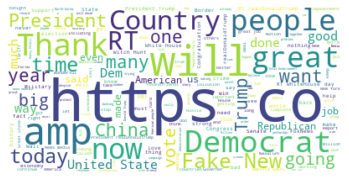

<Figure size 2160x2160 with 0 Axes>

In [61]:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(30,30))
plt.show()